In [1]:
using JuMP, Gurobi, Random, PyPlot
using TravelingSalesmanExact, GLPK
using DataFrames
const GRBENV = Gurobi.Env(); # Create a global gurobi environment to stop annoying academic messages.
using CSV

Academic license - for non-commercial use only - expires 2022-10-03


In [2]:
url = "/Users/ricardobortothopker/OneDrive - Massachusetts Institute of Technology/Classes/Thesis/excels/Points for TSP/"
problems = "TSP Problems3_corrected.pkl"
file_path = url*problems

"/Users/ricardobortothopker/OneDrive - Massachusetts Institute of Technology/Classes/Thesis/excels/Points for TSP/TSP Problems3_corrected.pkl"

In [3]:
using PyCall
@pyimport pickle

function mypickle(filename, obj)
    out = open(filename,"w")
    pickle.dump(obj, out)
    close(out)
 end

function myunpickle(filename)
    r = nothing
    @pywith pybuiltin("open")(filename,"rb") as f begin
        r = pickle.load(f)
    end
    return r
end

myunpickle (generic function with 1 method)

In [4]:
XYarr = myunpickle(file_path)

Dict{Any, Any} with 30 entries:
  "id 23" => [0.900175 0.279239; 1.02057 0.408153; … ; 0.211156 0.506546; 0.558…
  "id 24" => [0.899238 0.330166; 0.749873 0.0528481; … ; 0.835094 0.114457; 0.3…
  "id 30" => [0.312316 0.750049; 0.898289 0.46447; … ; 0.587129 0.905139; 0.519…
  "id 11" => [0.351625 0.889305; 0.896553 0.564551; … ; 0.627027 0.264201; 0.33…
  "id 9"  => [0.0318184 0.619369; 0.331986 0.877836; … ; 0.118299 0.221931; 0.5…
  "id 1"  => [0.438589 0.852584; 0.114222 0.886027; … ; 0.58973 0.852126; 0.935…
  "id 15" => [0.515636 0.584637; 1.32418 0.0711246; … ; 0.647916 0.856945; 0.14…
  "id 17" => [0.111909 0.865622; 1.21629 0.99945; … ; 1.10066 0.42899; 1.13455 …
  "id 27" => [1.20797 0.205174; 0.413592 0.379292; … ; 0.825826 0.0054223; 0.10…
  "id 0"  => [0.153303 0.615131; 0.106647 0.517469; … ; 0.374898 0.581495; 0.44…
  "id 19" => [0.306459 0.142856; 1.35467 0.549507; … ; 0.0314492 0.271946; 1.21…
  "id 20" => [0.910706 0.762152; 0.711857 0.405286; … ; 1.28156 0.417166; 0.9

In [5]:
function distance(pt1,pt2)
    dx = pt1[1]-pt2[1]
    dy = pt1[2]-pt2[2]
    
    return (dx^2+dy^2)^.5
end
function calculate_euclidean_distance_matrix(xy)
    len = size(xy,1)
    matrix = zeros(len,len)
    dist_dict = Dict()
    for i in 1:len
        for j in 1:len
#             if j !=i
                dist = distance(xy[i,:],xy[j,:])
                matrix[i,j] = dist
                matrix[j,i] = dist
                dist_dict[(i,j)] = dist
                dist_dict[(j,i)] = dist
#             end
        end
    end
    return dist_dict,matrix
end;

In [19]:
function plot_tsp(dsm,xy)
    figure()
    scatter(xy[:,1], xy[:,2], color="blue")
    len = size(xy,1)
    for i in 1:len
        tempxy = xy[dsm[i,:],:]
        plot(tempxy[:,1],tempxy[:,2],color="red")
    end
    plot()
end;

In [29]:
function plot_tsp_tour(tour,xy,cost,key)
    figure()
    len = length(xy)
    scatter(xy[:,1], xy[:,2], color="blue")
    len = size(xy,1)
        plot(xy[tour,1],xy[tour,2],color="red")
        plot(xy[[tour[1],tour[len]],1],xy[[tour[1],tour[len]],2],color="red")
    str = "best route: "
    str = str*string(tour)
    n=80
    if length(str)>n
        n = findnext(isequal(' '), str, n)
        str = str[1:n]*"\n"*str[n+1:length(str)]
    end
    annotate(str,(0,1.16),verticalalignment="top")
    annotate("cost :"*string(round(cost,digits=2)),(0,1.22),verticalalignment="top")
    annotate(key,(0,1.28),verticalalignment="top")
#     axis("off")
    for i in 1:len
        annotate(string(i),(xy[i,1],xy[i,2]))
    
    end
#     xlim(0, 1)
    ylim(0, 1.32)
    savefig("TSP solution "*key*"adjusted.png")
end

plot_tsp_tour (generic function with 1 method)

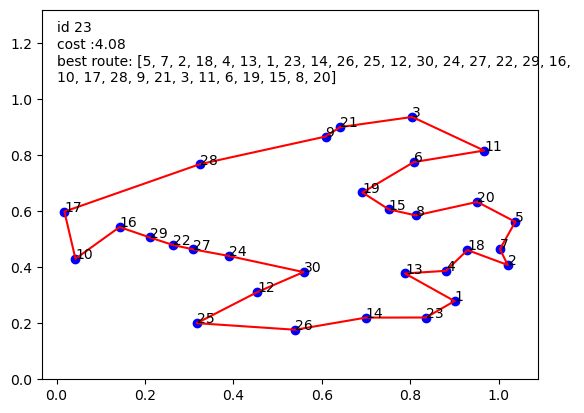

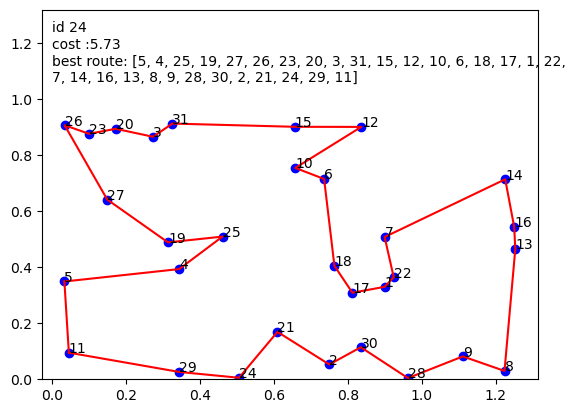

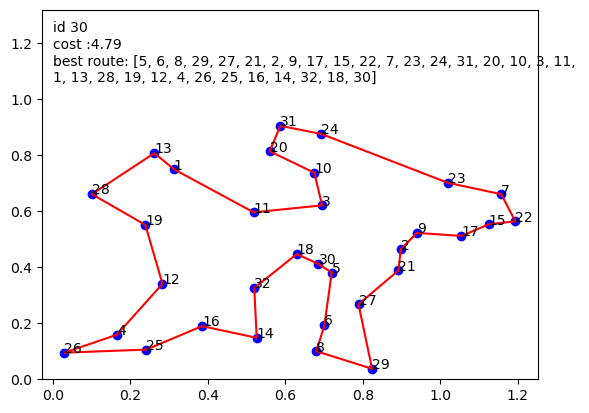

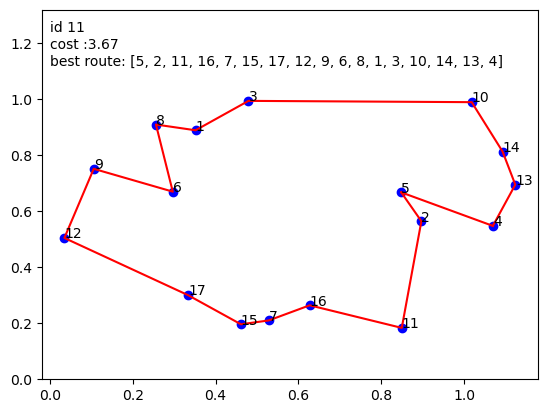

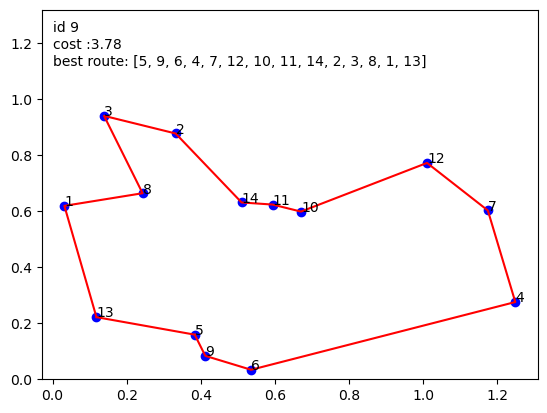

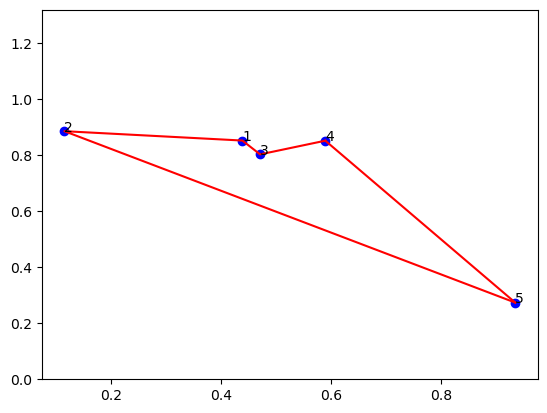

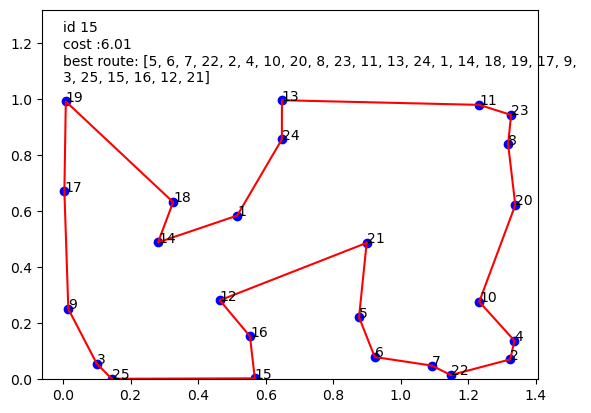

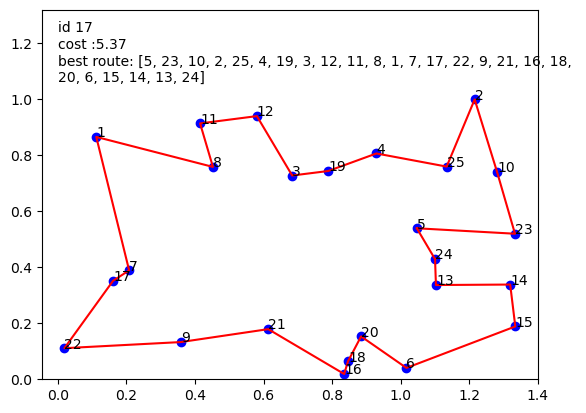

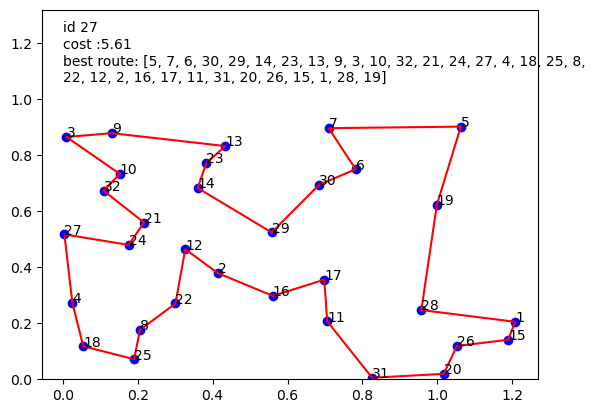

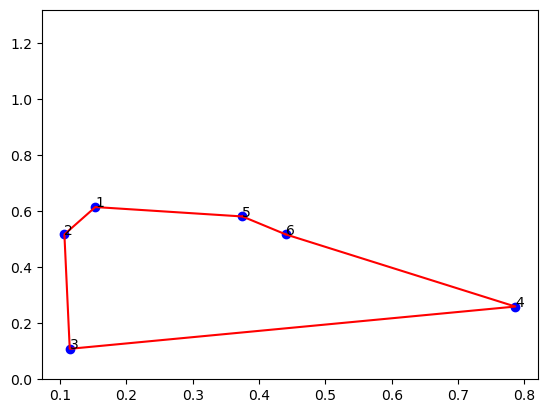

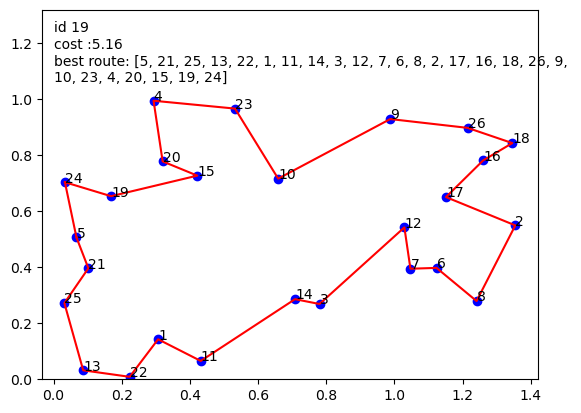

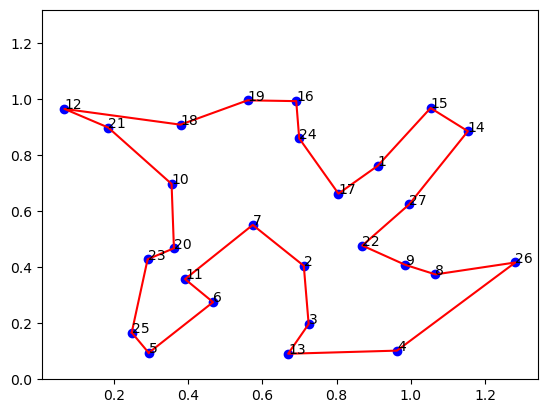

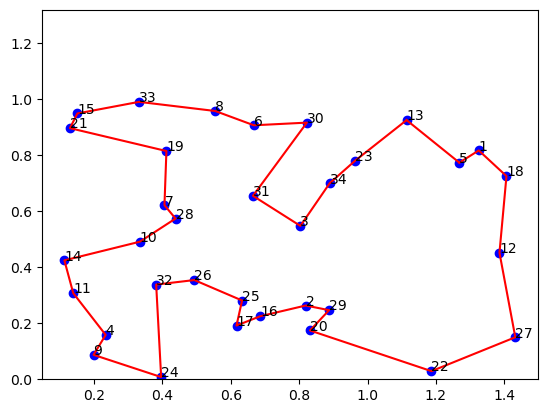

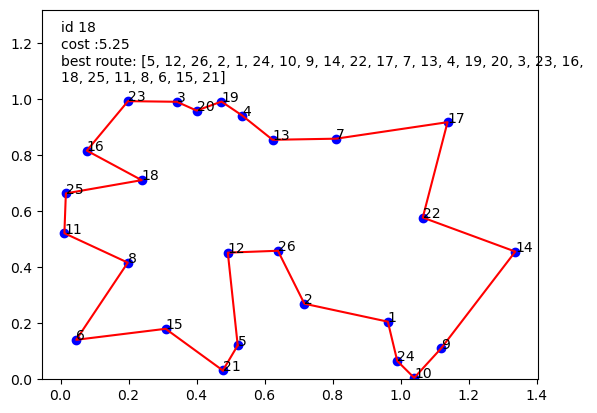

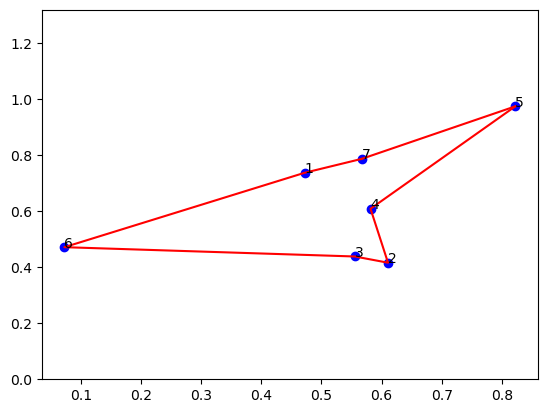

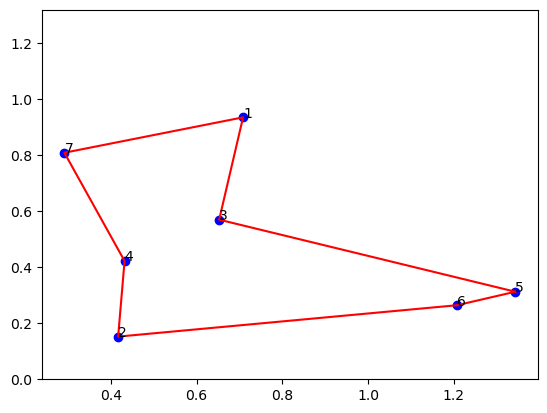

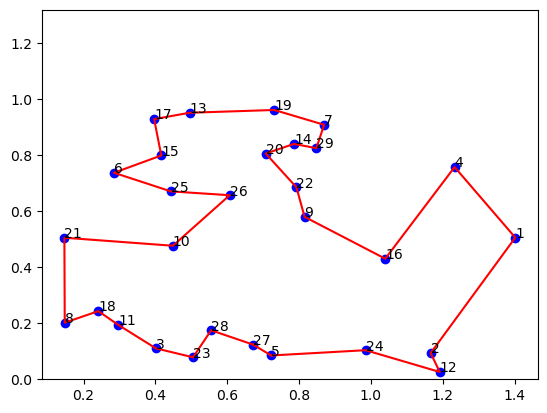

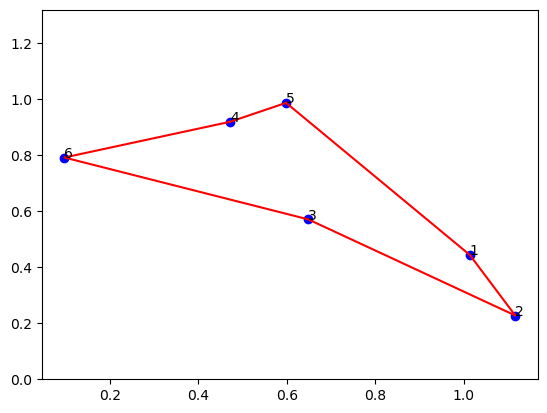

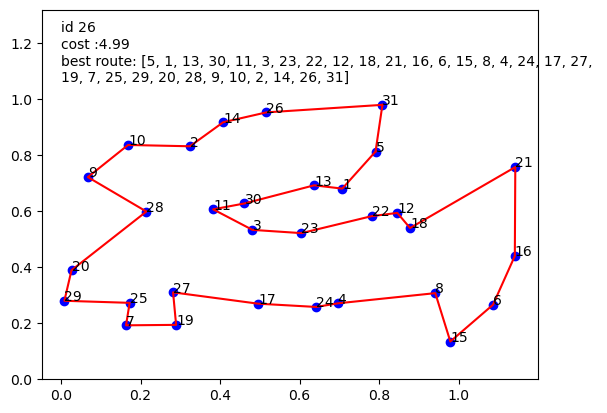

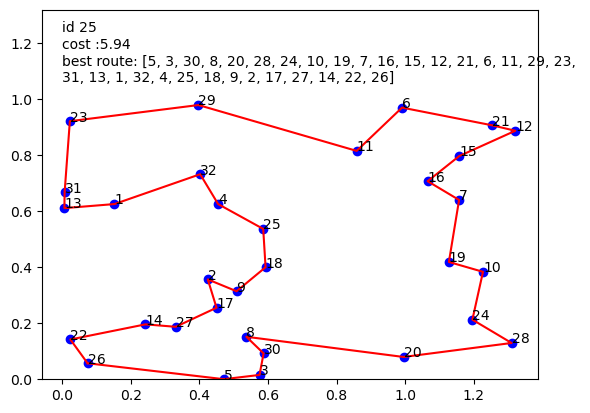

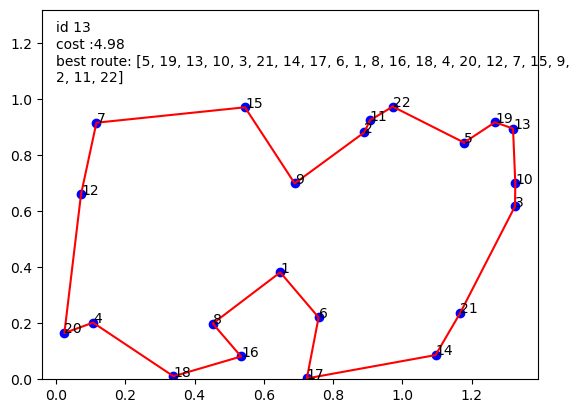

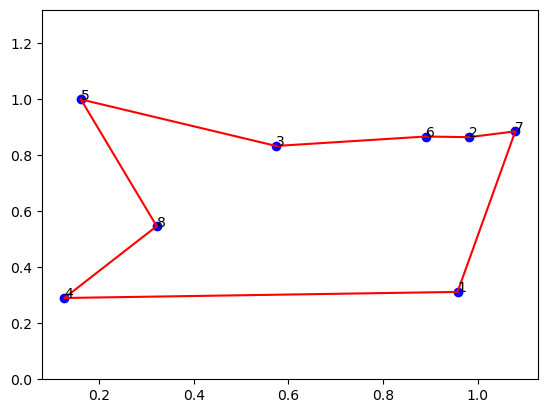

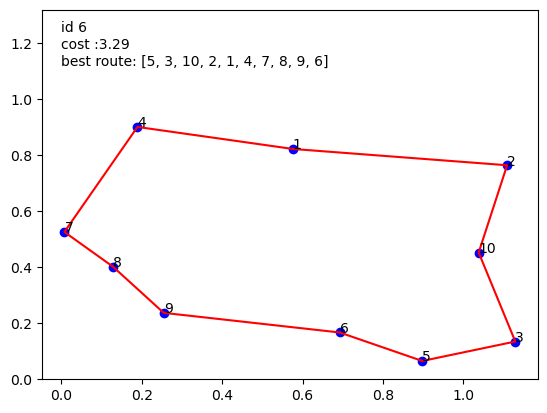

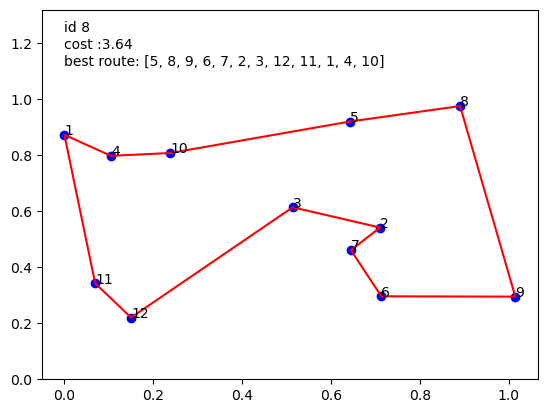

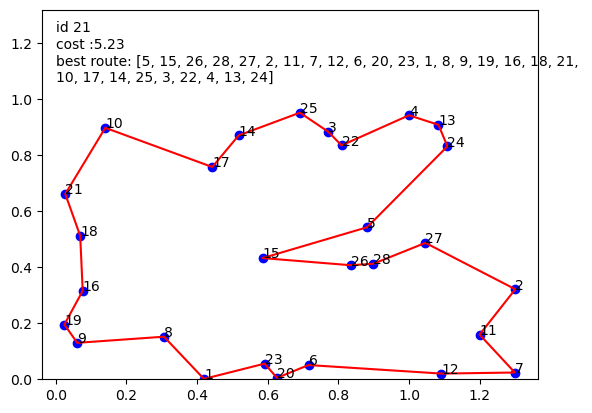

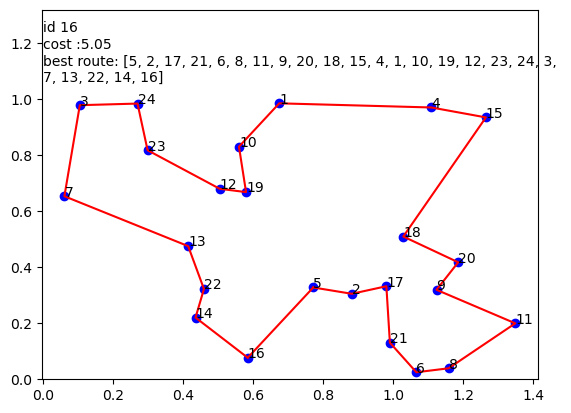

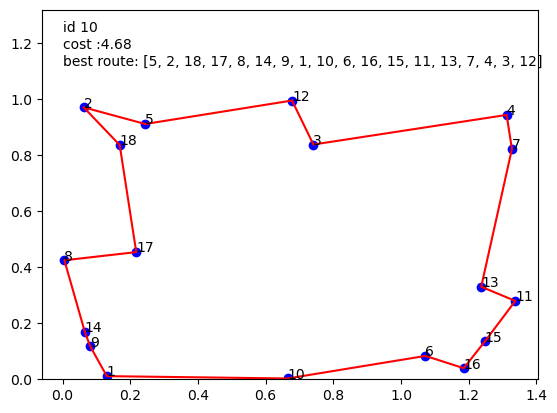

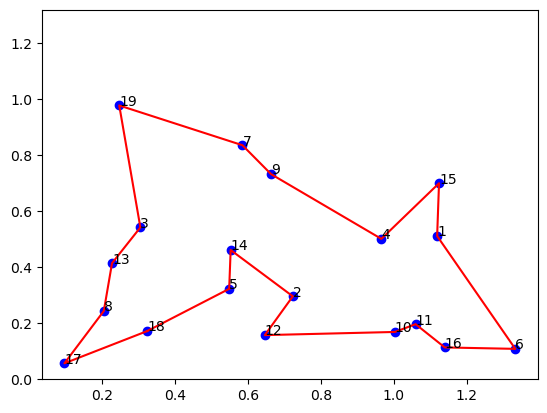

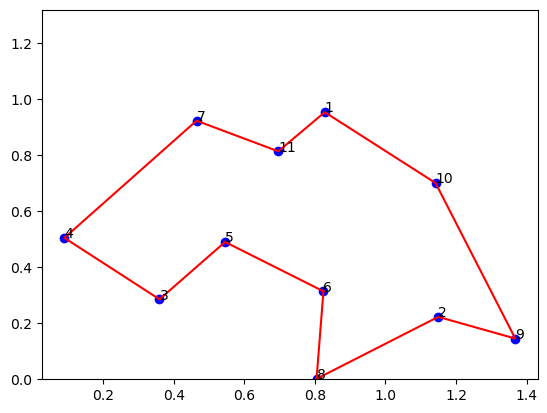

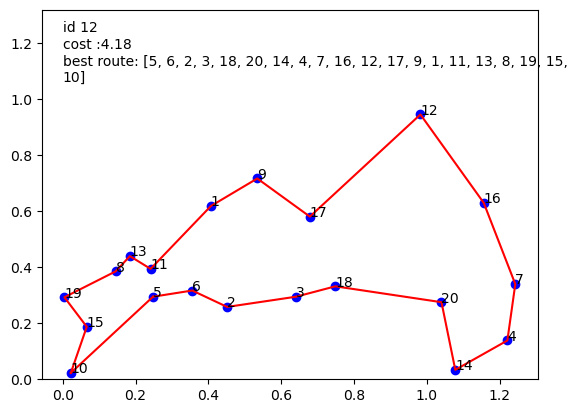

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [30]:
d = Dict()
for (key, value) in XYarr
    if key!="id 29"
        c_dict , c_matrix = calculate_euclidean_distance_matrix(value)
        set_default_optimizer!(GLPK.Optimizer)
        cities = c_matrix
        tour, cost = get_optimal_tour(cities; verbose = false)
        plot_tsp_tour(tour,value,cost,key)
        d[key]=Dict("cost"=>cost,"tour"=>tour)

    end
end

In [10]:
d

Dict{Any, Any} with 30 entries:
  "id 14" => Dict{String, Any}("cost"=>4.54065, "tour"=>[5, 14, 2, 12, 10, 11, …
  "id 7"  => Dict{String, Any}("cost"=>3.92153, "tour"=>[5, 3, 4, 7, 11, 1, 10,…
  "id 12" => Dict{String, Any}("cost"=>4.18196, "tour"=>[5, 6, 2, 3, 18, 20, 14…
  "id 11" => Dict{String, Any}("cost"=>3.67287, "tour"=>[5, 2, 11, 16, 7, 15, 1…
  "id 9"  => Dict{String, Any}("cost"=>3.78263, "tour"=>[5, 9, 6, 4, 7, 12, 10,…
  "id 1"  => Dict{String, Any}("cost"=>2.2125, "tour"=>[5, 2, 1, 3, 4])
  "id 15" => Dict{String, Any}("cost"=>6.01092, "tour"=>[5, 6, 7, 22, 2, 4, 10,…
  "id 17" => Dict{String, Any}("cost"=>5.37405, "tour"=>[5, 23, 10, 2, 25, 4, 1…
  "id 27" => Dict{String, Any}("cost"=>5.60907, "tour"=>[5, 7, 6, 30, 29, 14, 2…
  "id 19" => Dict{String, Any}("cost"=>5.1581, "tour"=>[5, 21, 25, 13, 22, 1, 1…
  "id 0"  => Dict{String, Any}("cost"=>1.9522, "tour"=>[5, 1, 2, 3, 4, 6])
  "id 20" => Dict{String, Any}("cost"=>5.43337, "tour"=>[5, 6, 11, 7, 2, 3, 13,…
  "id 28" =

In [11]:
df =DataFrame(cost = Float64[], tour = [],id=[])
for (key, value) in d
    d[key]["id"]=key
    push!(df, d[key])
end

In [12]:
CSV.write(url * "TSP solutions_adjusted.csv", df)

"/Users/ricardobortothopker/OneDrive - Massachusetts Institute of Technology/Classes/Thesis/excels/Points for TSP/TSP solutions_adjusted.csv"

In [18]:
for (key, value) in XYarr
    if key!="id 29"
        c_dict , c_matrix = calculate_euclidean_distance_matrix(value)
        df = DataFrame(c_matrix, :auto)
        CSV.write(url *key*".csv", df)

    end
end

**Code below does not work!**

In [137]:
function run_tsp(xy)
    c_dict , c_matrix = calculate_euclidean_distance_matrix(xy)
    m = Model(() -> Gurobi.Optimizer(GRBENV))
    set_optimizer_attribute(m, "OutputFlag", false)
    len = size(xy,1)
    # Variables: is city 'i' adjacent to city 'j' on the tour?
    @variable(m, x[1:len,1:len], Bin)
    # Constraint: two edges incident to each city
    @constraint(m,[i=1:len],sum(x[i,:]) == 2)
    @constraint(m,[i=1:len],sum(x[:,i]) == 2)
    @constraint(m, [i=1:len],sum(x[i,i]) == 0)
    # cons = m.addConstrs(vars.sum(c, '*') == 2 for c in capitals)
    @objective(m, Min ,sum(c_matrix.* x))
    optimize!(m)
    return value.(x) .== 1.0,sum(c_matrix.* value.(x))
end

run_tsp (generic function with 1 method)

In [102]:
opened = value.(x) .== 1.0

8×8 BitMatrix:
 0  0  1  1  0  0  0  0
 0  0  0  0  0  1  1  0
 1  0  0  0  1  0  0  0
 1  0  0  0  0  0  0  1
 0  0  1  0  0  0  0  1
 0  1  0  0  0  0  1  0
 0  1  0  0  0  1  0  0
 0  0  0  1  1  0  0  0

In [123]:
opened

8×8 BitMatrix:
 0  0  1  1  0  0  0  0
 0  0  0  0  0  1  1  0
 1  0  0  0  1  0  0  0
 1  0  0  0  0  0  0  1
 0  0  1  0  0  0  0  1
 0  1  0  0  0  0  1  0
 0  1  0  0  0  1  0  0
 0  0  0  1  1  0  0  0

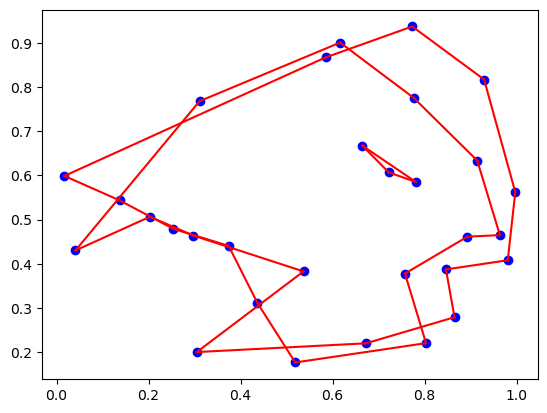

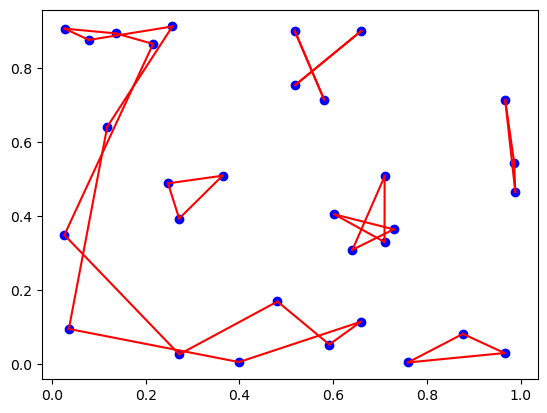

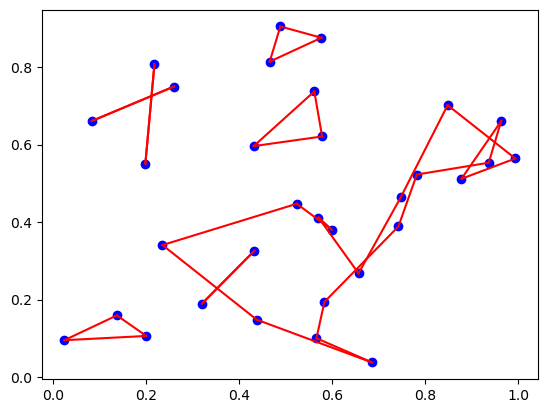

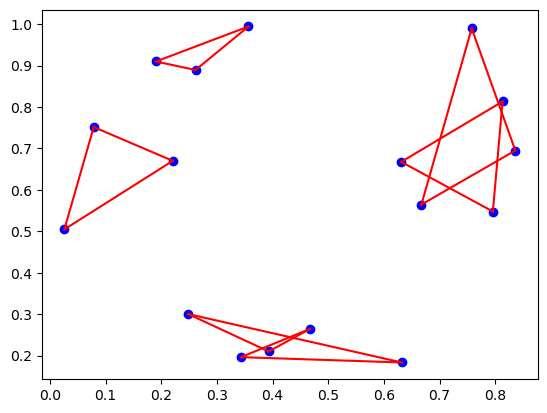

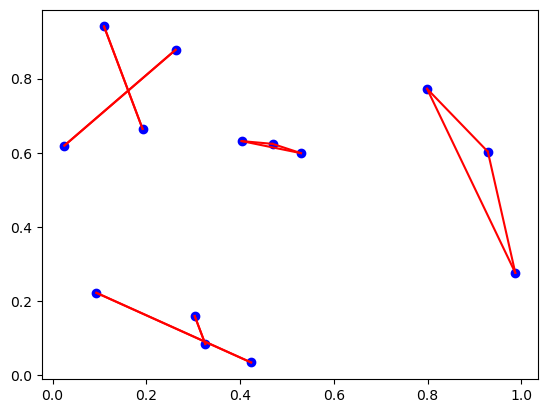

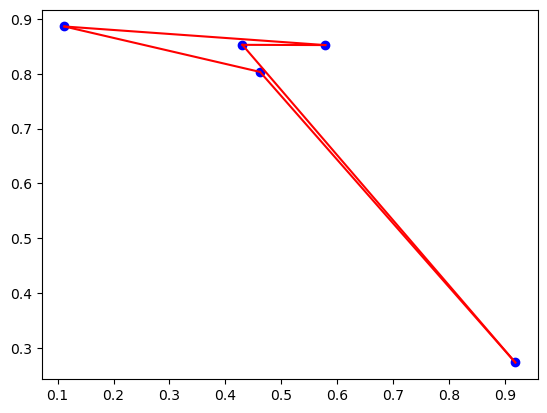

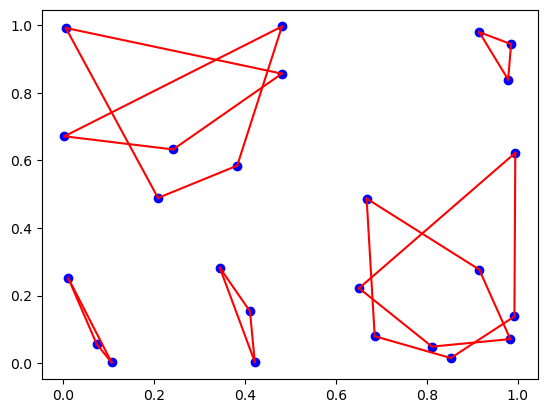

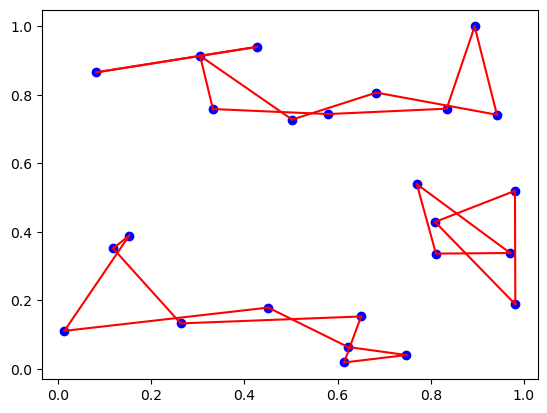

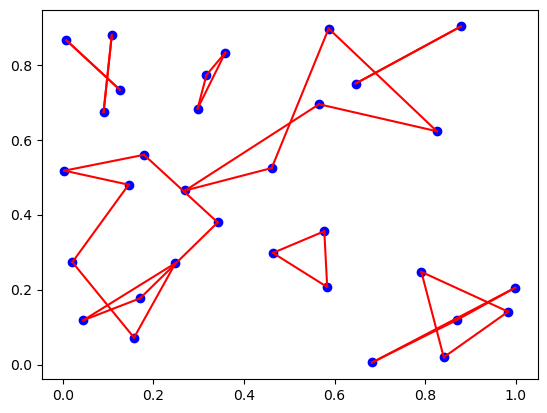

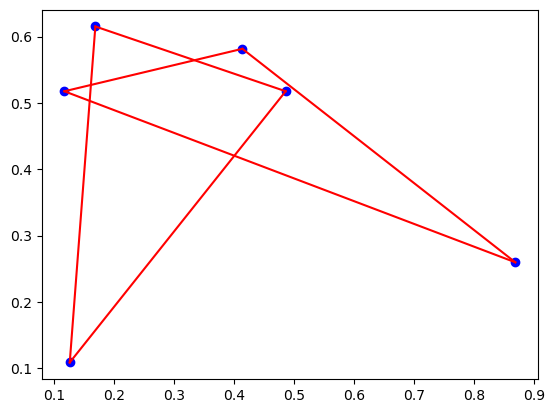

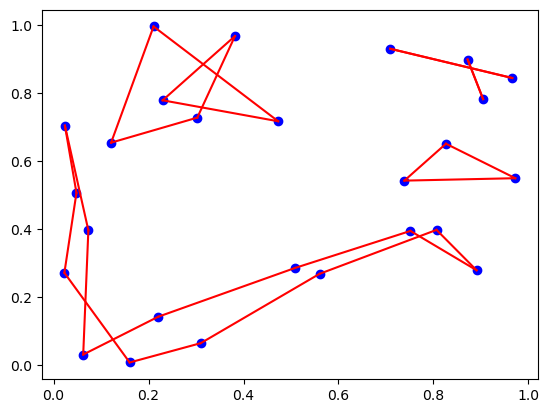

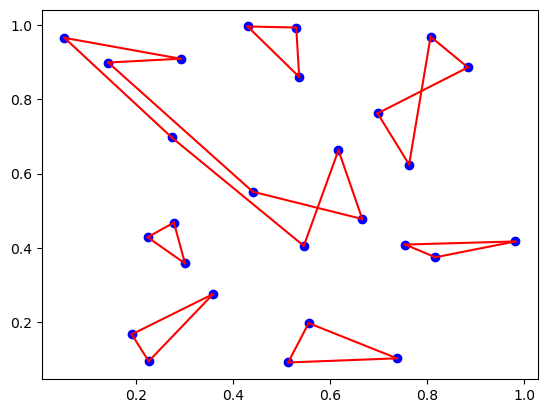

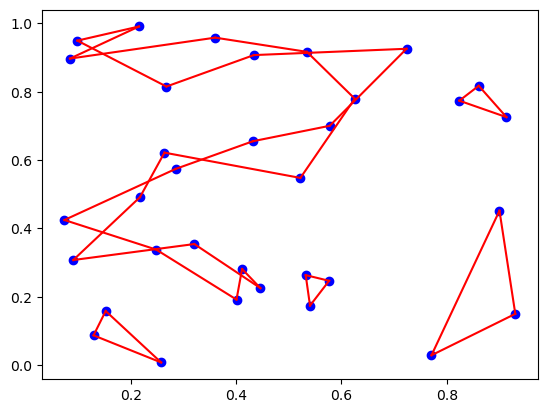

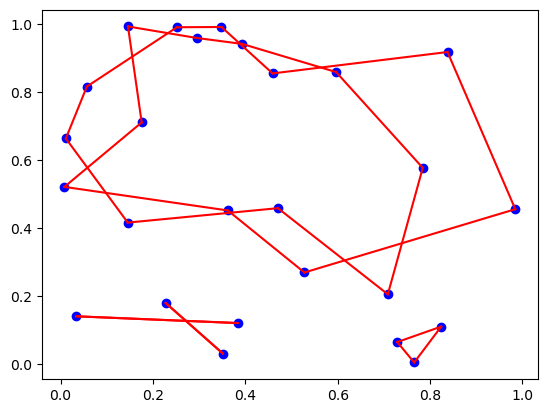

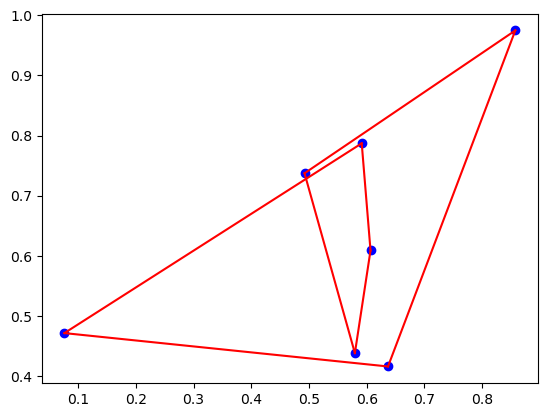

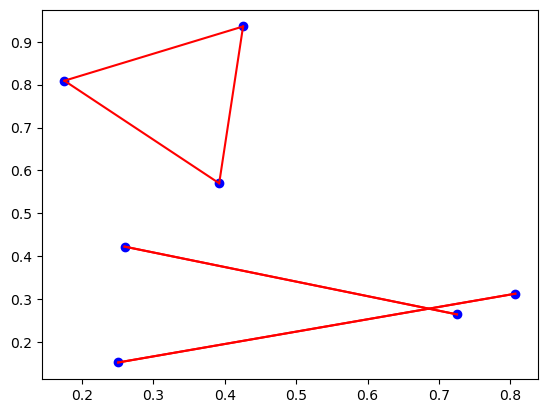

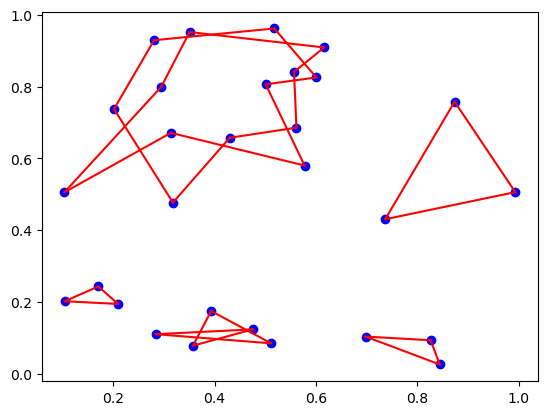

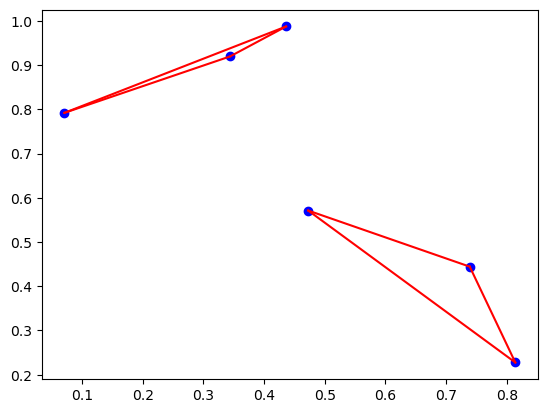

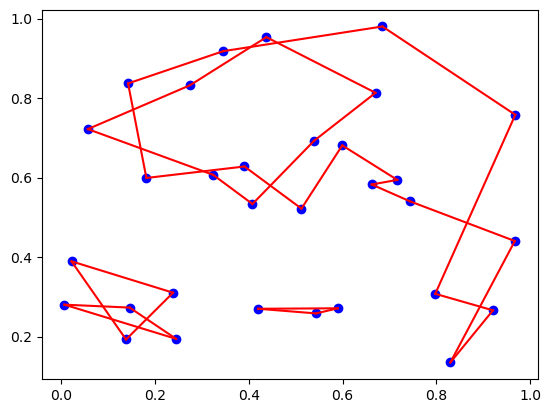

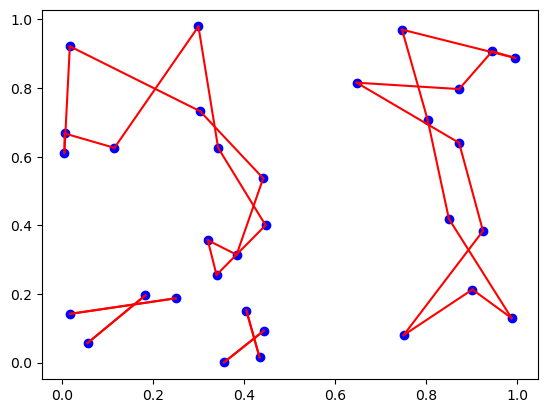

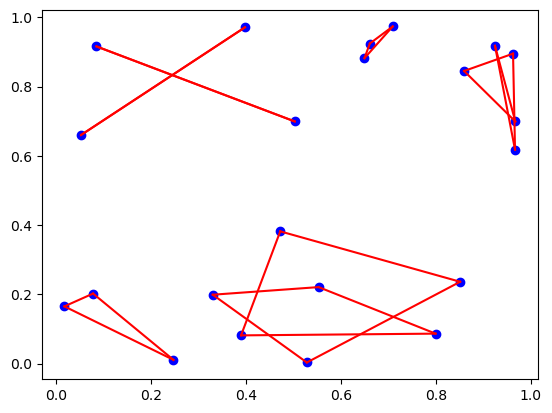

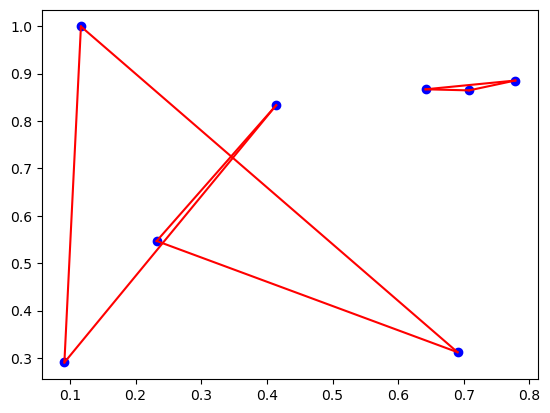

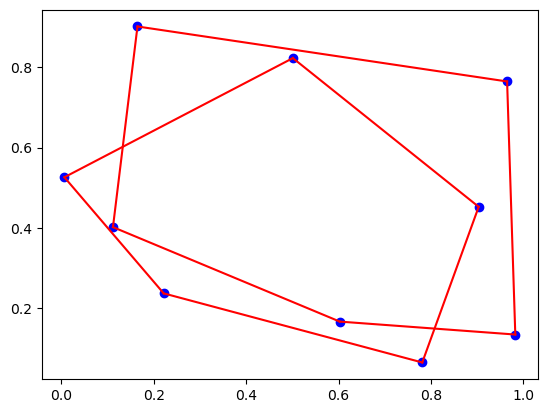

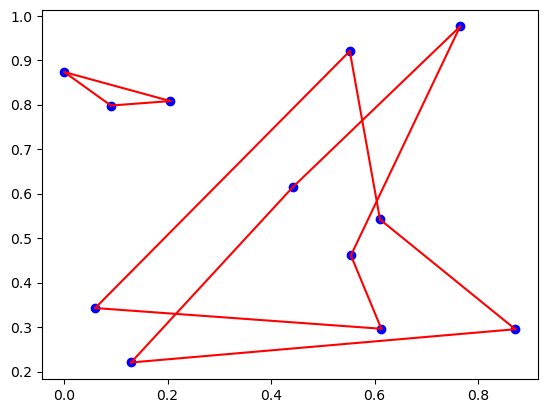

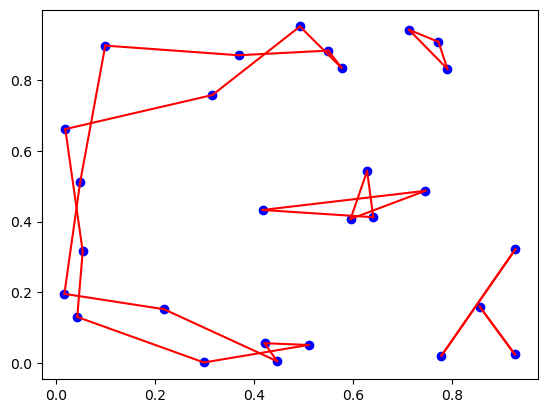

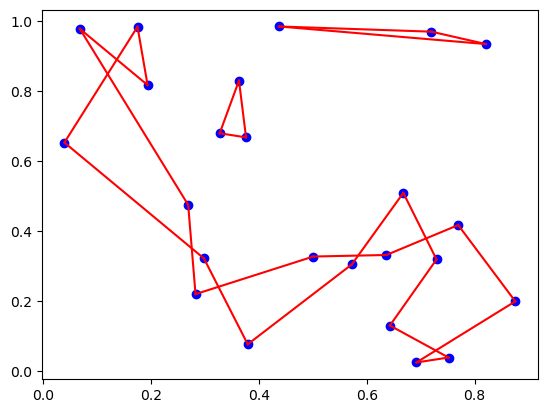

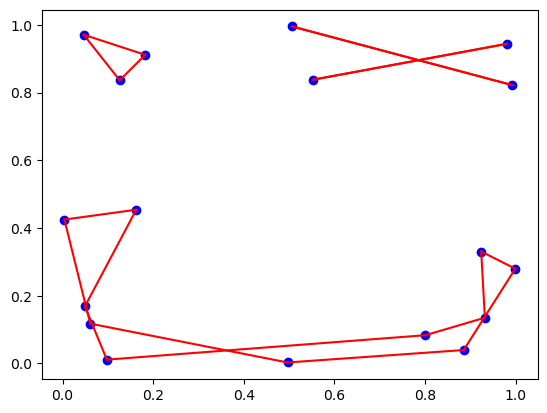

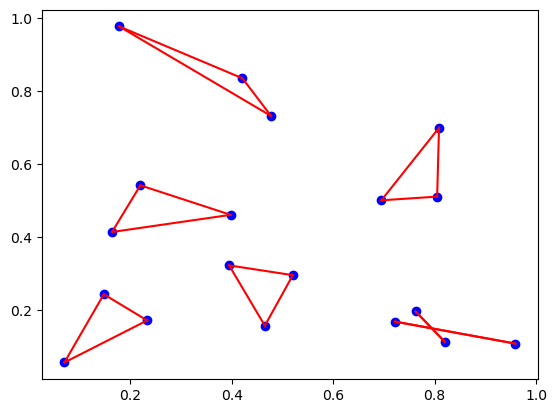

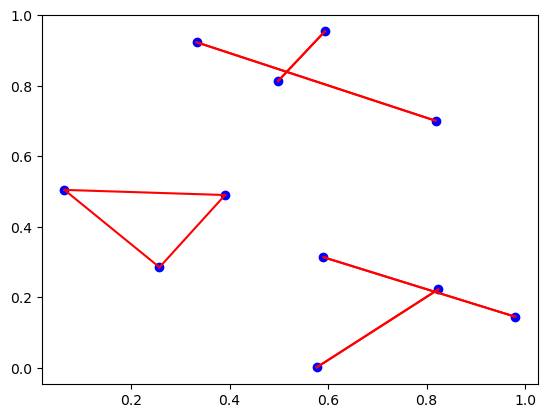

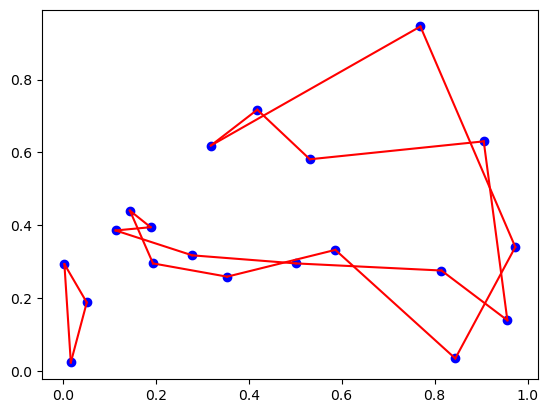

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [181]:
for (key, value) in XYarr
    if key!="id 29"
        dsm, dist = run_tsp(value)
        
        plot_tsp(dsm,value)
    end
end

In [183]:
using TravelingSalesmanExact

LoadError: ArgumentError: Package TravelingSalesmanExact not found in current path:
- Run `import Pkg; Pkg.add("TravelingSalesmanExact")` to install the TravelingSalesmanExact package.


In [189]:
using TravelingSalesmanExact, GLPK


┌ Info: Starting optimization.
└ @ TravelingSalesmanExact /Users/ricardobortothopker/.julia/packages/TravelingSalesmanExact/V59gF/src/TravelingSalesmanExact.jl:319
┌ Info: Iteration 1 took 1.62 seconds, disallowed 2 cycles.
└ @ TravelingSalesmanExact /Users/ricardobortothopker/.julia/packages/TravelingSalesmanExact/V59gF/src/TravelingSalesmanExact.jl:356
┌ Info: Iteration 2 took 0.0003 seconds, found a full cycle!
└ @ TravelingSalesmanExact /Users/ricardobortothopker/.julia/packages/TravelingSalesmanExact/V59gF/src/TravelingSalesmanExact.jl:356
┌ Info: Optimization finished; adaptively disallowed 2 cycles.
└ @ TravelingSalesmanExact /Users/ricardobortothopker/.julia/packages/TravelingSalesmanExact/V59gF/src/TravelingSalesmanExact.jl:372
┌ Info: The optimization runs took 1.62 seconds in total.
└ @ TravelingSalesmanExact /Users/ricardobortothopker/.julia/packages/TravelingSalesmanExact/V59gF/src/TravelingSalesmanExact.jl:373
┌ Info: Final path has length 2.65.
└ @ TravelingSalesmanExact

       ┌────────────────────────────────────────┐ 
   0.9 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡤⠊│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠔⠁⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⠔⠁⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡠⠊⠁⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡠⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠔⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠊⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠔⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⠀⠀⠀⡠⠚⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⠀⠀⢀⡴⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⠀⠀⢀⠴⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       │⠀⠀⣠⠔⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
     0 │⣠⠞⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
       └───────────────────────

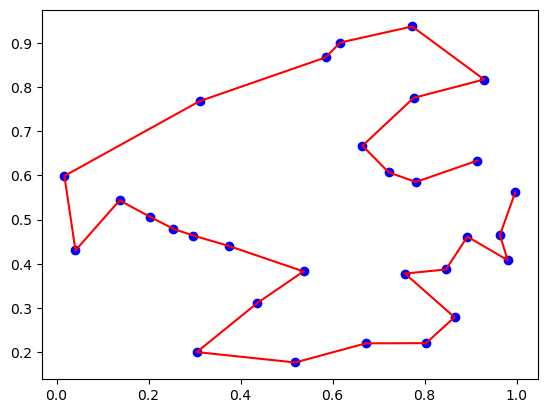

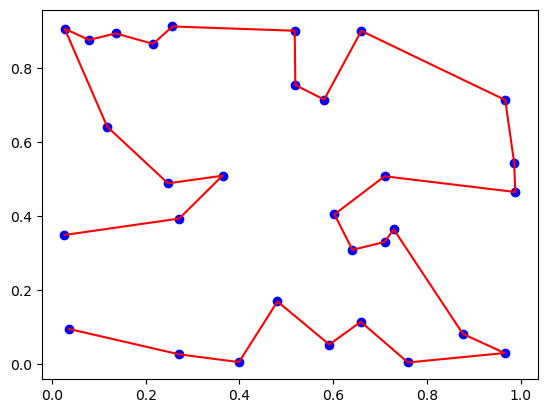

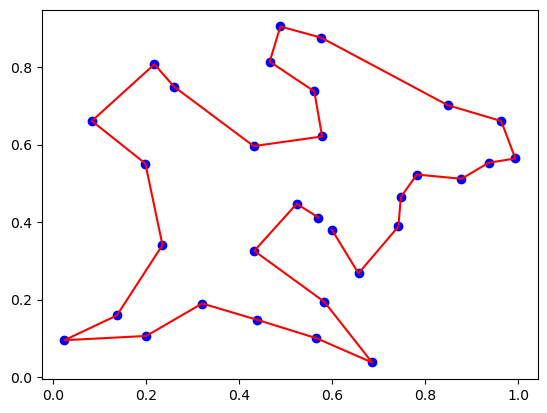

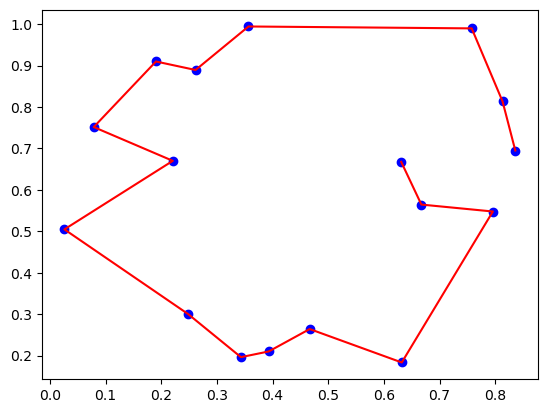

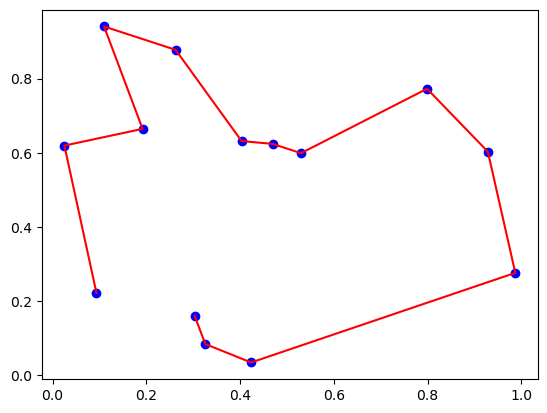

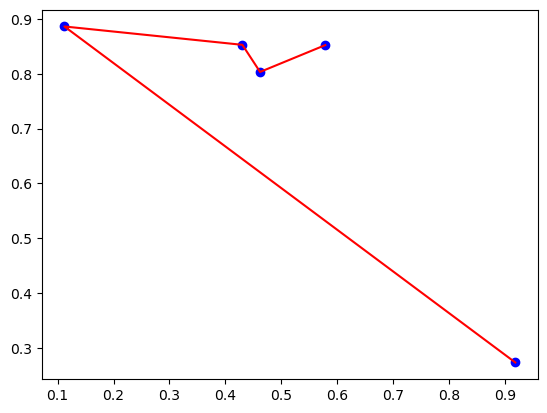

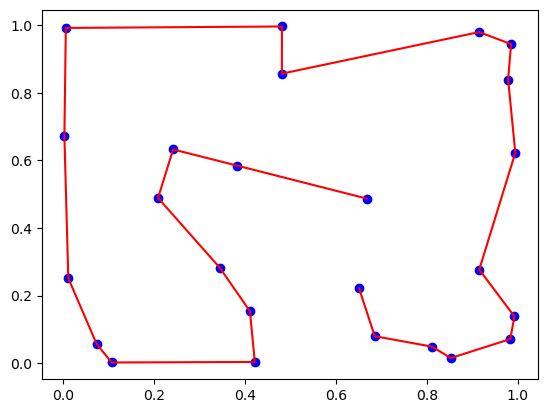

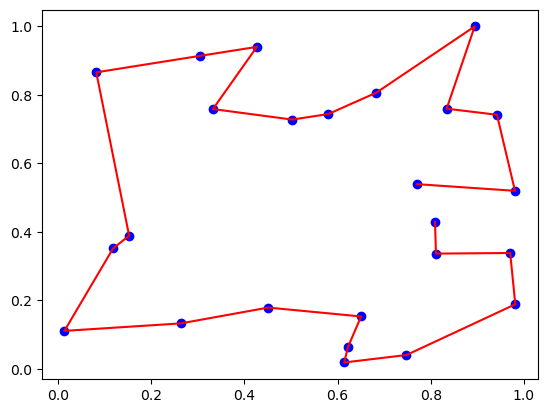

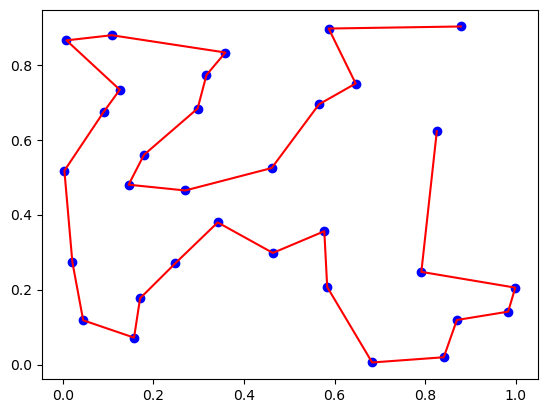

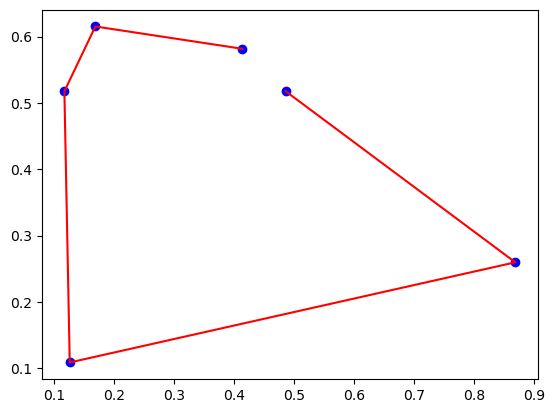

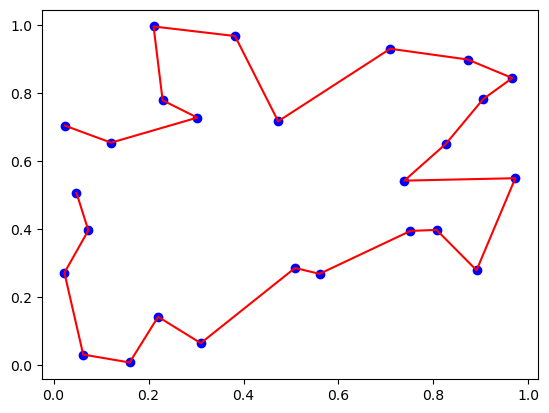

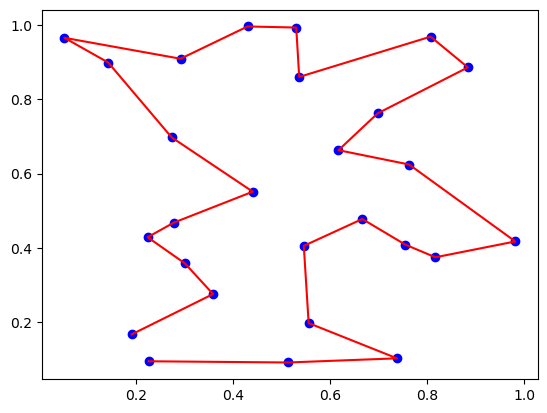

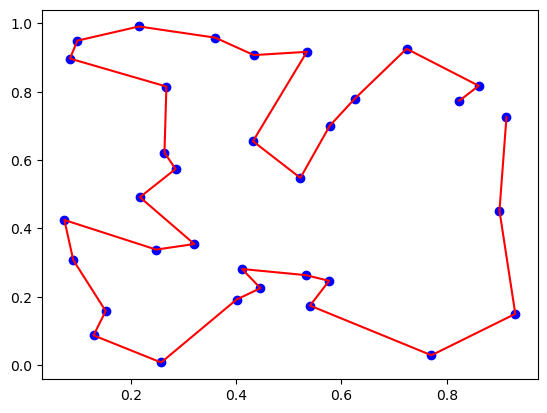

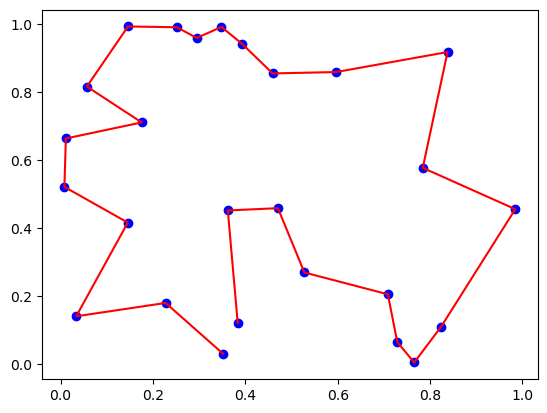

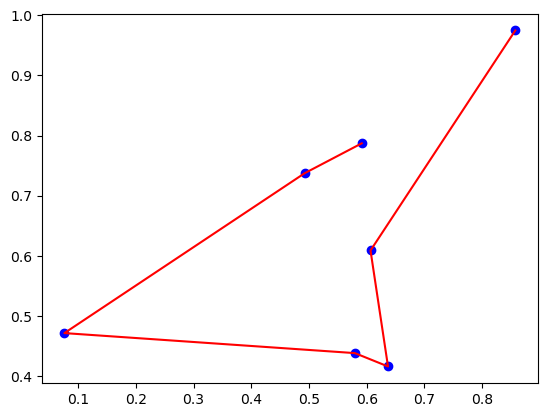

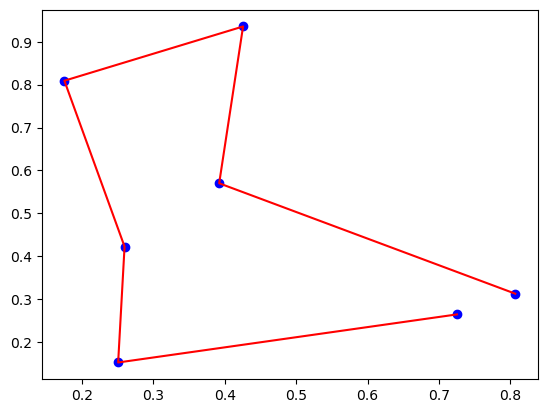

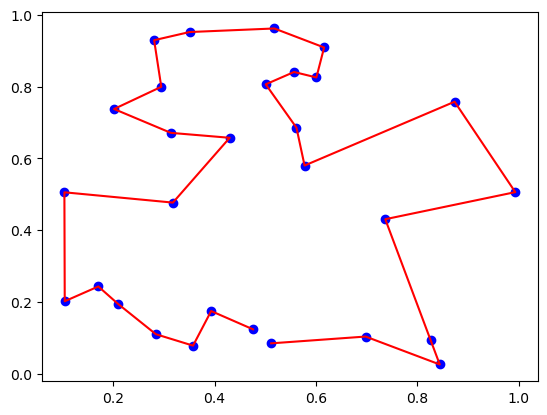

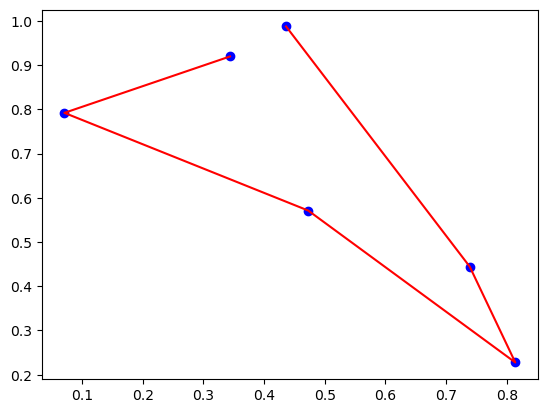

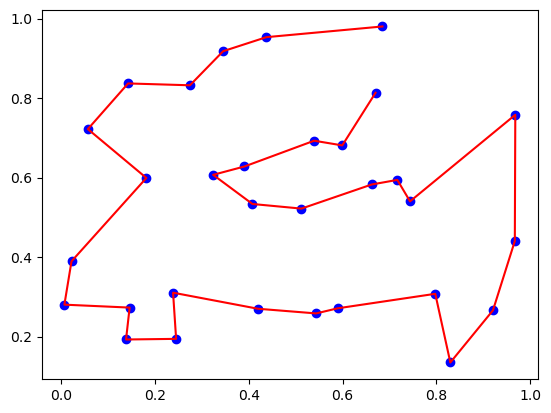

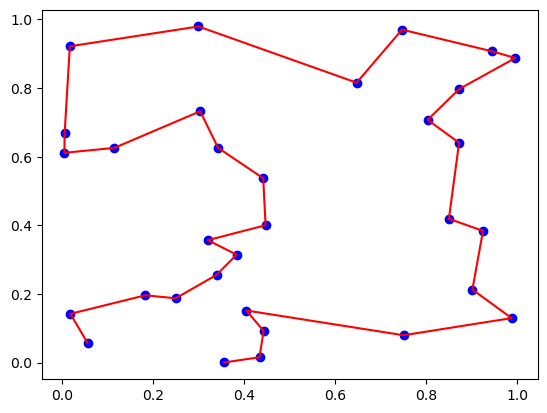

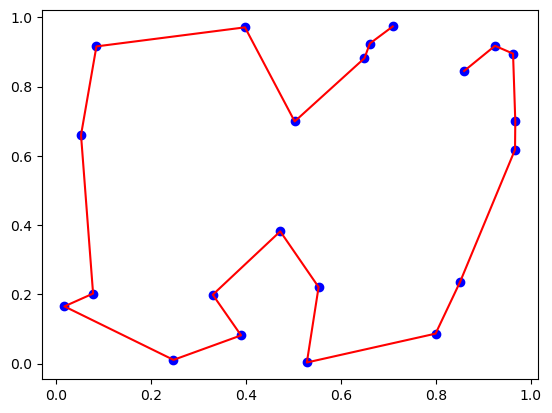

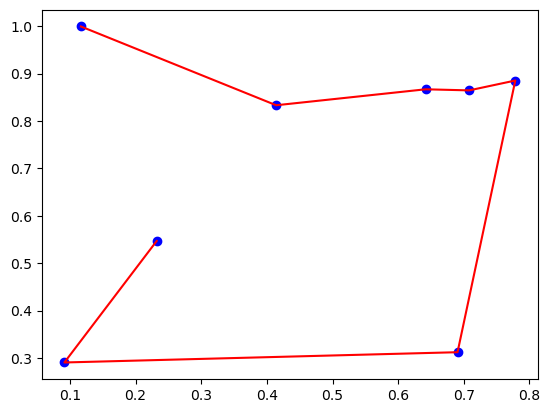

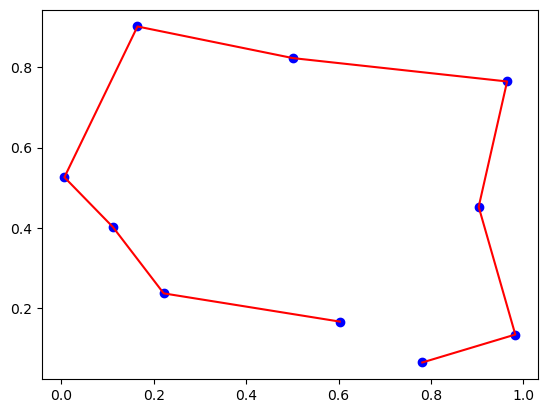

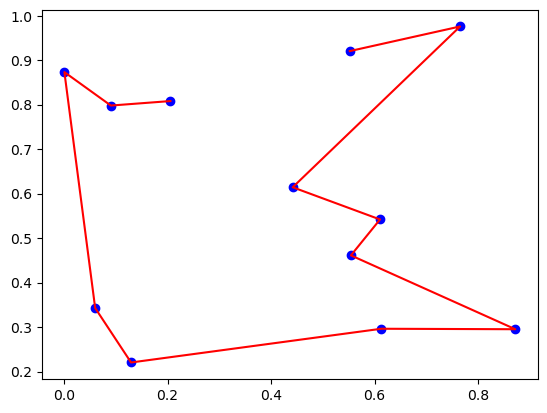

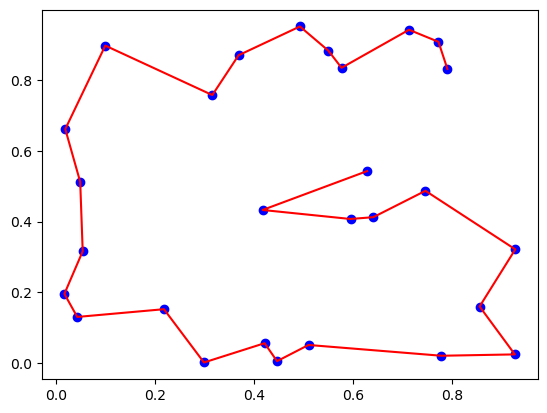

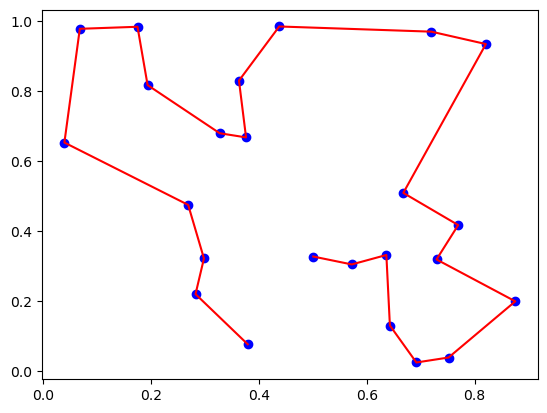

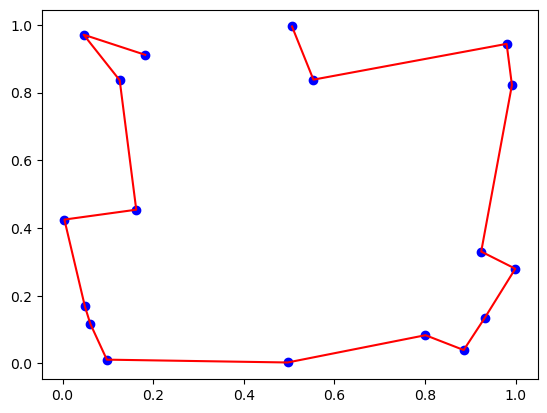

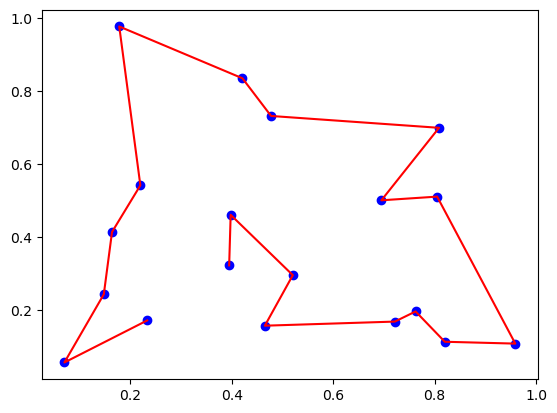

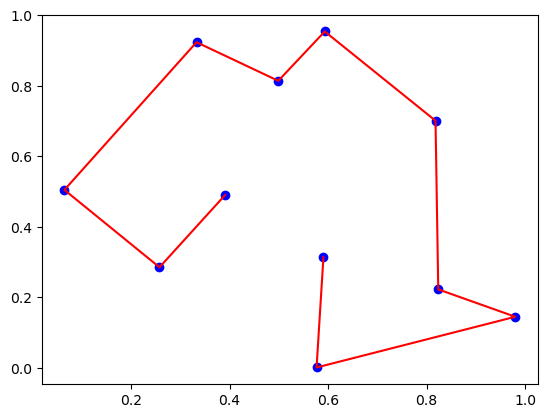

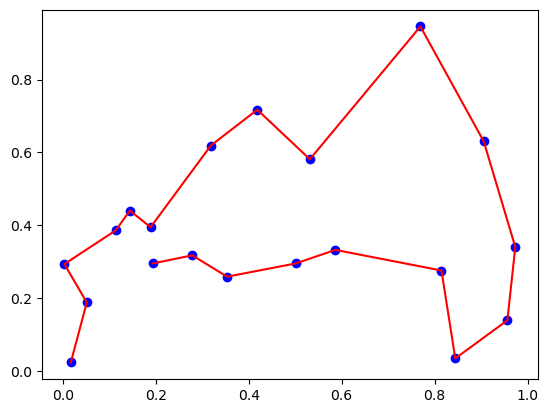

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [197]:
for (key, value) in XYarr
    if key!="id 29"
        c_dict , c_matrix = calculate_euclidean_distance_matrix(value)
        set_default_optimizer!(GLPK.Optimizer)
        cities = c_matrix
        tour, cost = get_optimal_tour(cities; verbose = false)
        plot_tsp_tour(tour,value)

    end
end



In [253]:
str = "123456789"

"123456789"

In [254]:
str[3:7]

"34567"

In [256]:
str=str[1:3]*"add"*str[4:9]

"123add456789"